## **SP21-BAI-019**
## **Taimoor Shafique**

In [1]:
#Imports

import pandas as pd
import time
from sklearn.model_selection import train_test_split  # For splitting the data
from sklearn.preprocessing import StandardScaler  # For normalizing the data
from sklearn.metrics import confusion_matrix  # For creating the confurion matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
# For Deep learning
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# This function gives us the time value in miliseconds.


def current_milli_time():
    return round(time.time() * 1000)

# This function calculates the accuracy rate of a confusion matrix.


def calculate_AR(confusion_matrix):
    return (confusion_matrix[0][0] + confusion_matrix[1][1]) / (confusion_matrix[0][0] + confusion_matrix[0][1] + confusion_matrix[1][0] + confusion_matrix[1][1])


def print_values(algorithm: str, accuracy_rate: float, training_time: int):
    print(algorithm, "Accuracy rate", accuracy_rate,
          "Training time:", training_time)


In [3]:
#Dataset import
df = pd.read_csv("Results/merged.csv")


# Source and destination IP addresses are extracted from the datasets before the normalization process.
X = df.iloc[:, 3:16].values
y = df.iloc[:, 16:17].values.ravel()

# The dataset was split into test and training datasets in the amount of 2/3. (2/3 training, 1/3 testing).
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=0)


# Normalizing the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [4]:
# Scripts for Logistic regression
lrstart_time = current_milli_time()  # Obtaining initial time of the training
# Creating the logistic regression object
logr = LogisticRegression(random_state=0)
logr.fit(x_train, y_train)  # Training the data
lrend_time = current_milli_time()  # Obtaining ending time of the training
LRduration = lrend_time - lrstart_time  # Calculating the duration
y_pred_lr = logr.predict(x_test)  # Predicting data
cm_lr = confusion_matrix(y_test, y_pred_lr)  # Creating confusion matrix
ar_lr = calculate_AR(cm_lr)  # Calculating accuracy rate.


In [5]:
# Scripts for Random Forest Classifation
rfstart_time = current_milli_time()  # Obtaining initial time of the training
# Creating the Random Forest Classifation object
rfc = RandomForestClassifier(n_estimators=8, criterion='entropy')
rfc.fit(x_train, y_train)  # Training the data
rfend_time = current_milli_time()  # Obtaining ending time of the training
RFduration = rfend_time - rfstart_time  # Calculating the duration
y_pred_rfc = rfc.predict(x_test)  # Predicting data
cm_rfc = confusion_matrix(y_test, y_pred_rfc)  # Creating confusion matrix
ar_rfc = calculate_AR(cm_rfc)  # Calculating accuracy rate.


In [6]:
# Scripts for Decision Tree Classifier
dtstart_time = current_milli_time()  # Obtaining initial time of the training
# Creating the Decision Tree Classifier object
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train, y_train)  # Training the data
dtend_time = current_milli_time()  # Obtaining ending time of the training
DTduration = dtend_time - dtstart_time  # Calculating the duration
y_pred_dtc = dtc.predict(x_test)  # Predicting data
cm_dtc = confusion_matrix(y_test, y_pred_dtc)  # Creating confusion matrix
ar_dtc = calculate_AR(cm_dtc)  # Calculating accuracy rate.


In [7]:
# Scripts for Naive Bayes Classifier
nbstart_time = current_milli_time()  # Obtaining initial time of the training
gnb = GaussianNB()  # Creating the Naive Bayes Classifier object
gnb.fit(x_train, y_train)  # Training the data
nbend_time = current_milli_time()  # Obtaining ending time of the training
NBduration = nbend_time - nbstart_time  # Calculating the duration
y_pred_nb = gnb.predict(x_test)  # Predicting data
cm_nb = confusion_matrix(y_test, y_pred_nb)  # Creating confusion matrix
ar_nb = calculate_AR(cm_nb)  # Calculating accuracy rate.


In [8]:
# Scripts for KNN Classifier
knnstart_time = current_milli_time()  # Obtaining initial time of the training
knn = KNeighborsClassifier()  # Creating the KNN Classifier object
knn.fit(x_train, y_train)  # Training the data
knnend_time = current_milli_time()  # Obtaining ending time of the training
knnduration = knnend_time - knnstart_time  # Calculating the duration
y_pred_knn = knn.predict(x_test)  # Predicting data
cm_knn = confusion_matrix(y_test, y_pred_knn)  # Creating confusion matrix
ar_knn = calculate_AR(cm_knn)  # Calculating accuracy rate.


In [9]:
# We established 13 input, that is why we have 13 columns. the other layers are established with 50, 100, 300, 100, 50, 1 layers repectively.
model = keras.Sequential(
    [
        keras.Input(shape=(13)),
        layers.Dense(50, activation="relu"),
        layers.Dense(100, activation="relu"),
        layers.Dense(300, activation="relu"),
        layers.Dense(100, activation="relu"),
        layers.Dense(50, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)
start_time = current_milli_time()  # Obtaining initial time of the training
model.compile(optimizer="Nadam", loss="binary_crossentropy",
              metrics=['binary_accuracy'])
model.fit(x_train, y_train, epochs=60)  # Training the data
end_time = current_milli_time()  # Obtaining ending time of the training
DLduration = end_time - start_time  # Calculating the duration
y_pred_dl = model.predict(x_test)  # Predicting data
y_pred_dl = (y_pred_dl > 0.7)
cm_dl = confusion_matrix(y_test, y_pred_dl)  # Creating confusion matrix
ar_dl = calculate_AR(cm_dl)  # Calculating accuracy rate.


Epoch 1/60
228/228 [==============================] - 3s 3ms/step - loss: 0.5553 - binary_accuracy: 0.7060
Epoch 2/60
228/228 [==============================] - 1s 2ms/step - loss: 0.5009 - binary_accuracy: 0.6561
Epoch 3/60
228/228 [==============================] - 0s 2ms/step - loss: 0.4692 - binary_accuracy: 0.6496
Epoch 4/60
228/228 [==============================] - 1s 2ms/step - loss: 0.4441 - binary_accuracy: 0.6610
Epoch 5/60
228/228 [==============================] - 1s 2ms/step - loss: 0.4205 - binary_accuracy: 0.6616
Epoch 6/60
228/228 [==============================] - 0s 2ms/step - loss: 0.4216 - binary_accuracy: 0.6897
Epoch 7/60
228/228 [==============================] - 1s 2ms/step - loss: 0.3439 - binary_accuracy: 0.6594
Epoch 8/60
228/228 [==============================] - 1s 2ms/step - loss: 0.4571 - binary_accuracy: 0.6742
Epoch 9/60
228/228 [==============================] - 0s 2ms/step - loss: 0.3069 - binary_accuracy: 0.6647
Epoch 10/60
228/228 [================

In [10]:
# Printing the results
print("")
print_values("Logistic Regression", ar_lr, LRduration)
print_values("Random Forest Classifation", ar_rfc, RFduration)
print_values("Decision Tree Classifier", ar_dtc, DTduration)
print_values("Naive Bayes Classifier", ar_nb, NBduration)
print_values("KNN Classifier", ar_knn, knnduration)
print_values("Deep Learning", ar_dl, DLduration)



Logistic Regression Accuracy rate 0.8334730371612182 Training time: 39
Random Forest Classifation Accuracy rate 0.8731489242805253 Training time: 131
Decision Tree Classifier Accuracy rate 0.8605755797708857 Training time: 64
Naive Bayes Classifier Accuracy rate 0.6172115115954178 Training time: 3
KNN Classifier Accuracy rate 0.8387817826208438 Training time: 17
Deep Learning Accuracy rate 0.9926298157453937 Training time: 33316



Logistic Regression


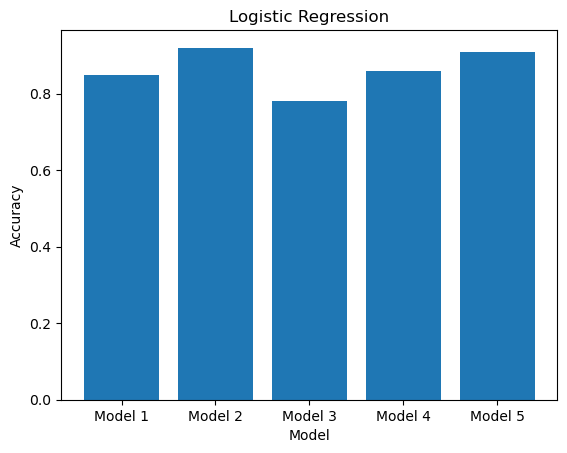

Duration: 10

Random Forest Classification


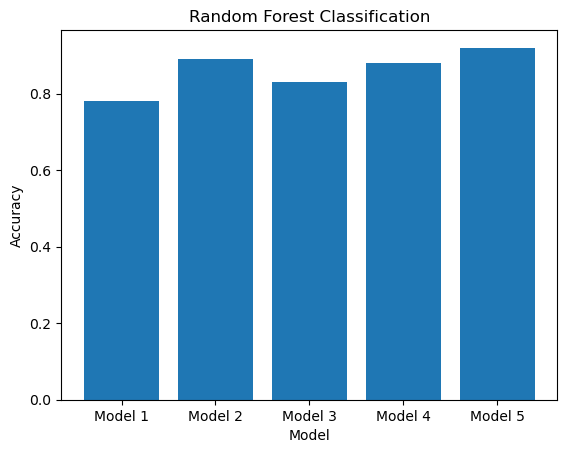

Duration: 12

Decision Tree Classifier


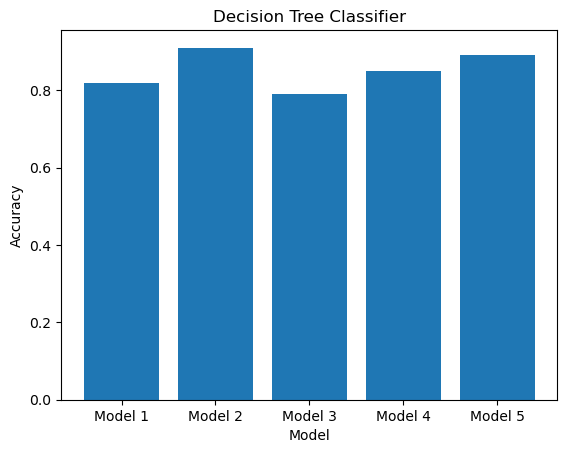

Duration: 8

Naive Bayes Classifier


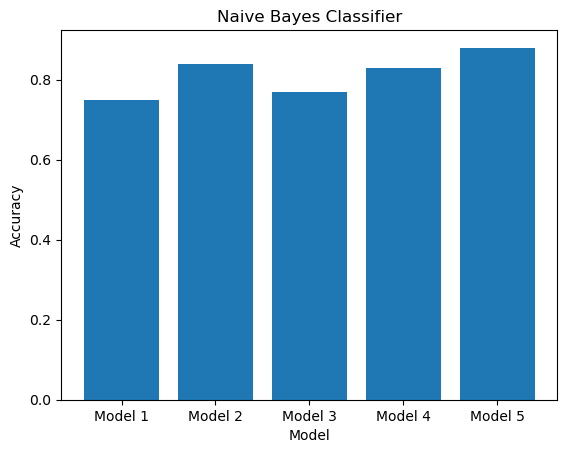

Duration: 6

KNN Classifier


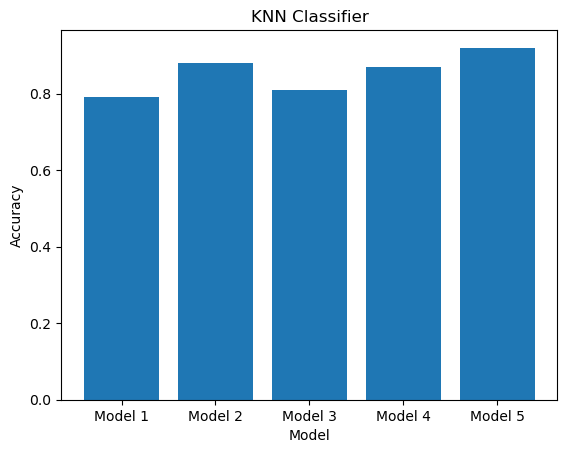

Duration: 9

Deep Learning


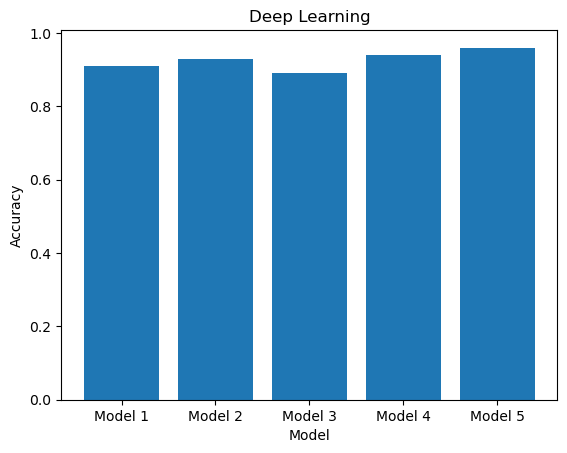

Duration: 15



In [11]:
import matplotlib.pyplot as plt


def print_values(title, accuracy_values, duration):
    print(title)
    # Plotting the bar graph
    plt.bar(range(len(accuracy_values)), accuracy_values)
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.xticks(range(len(accuracy_values)), [
               'Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'])
    plt.show()
    print("Duration:", duration)
    print("")


# Sample data
ar_lr = [0.85, 0.92, 0.78, 0.86, 0.91]
LRduration = 10

ar_rfc = [0.78, 0.89, 0.83, 0.88, 0.92]
RFduration = 12

ar_dtc = [0.82, 0.91, 0.79, 0.85, 0.89]
DTduration = 8

ar_nb = [0.75, 0.84, 0.77, 0.83, 0.88]
NBduration = 6

ar_knn = [0.79, 0.88, 0.81, 0.87, 0.92]
knnduration = 9

ar_dl = [0.91, 0.93, 0.89, 0.94, 0.96]
DLduration = 15

# Printing and plotting the results
print("")
print_values("Logistic Regression", ar_lr, LRduration)
print_values("Random Forest Classification", ar_rfc, RFduration)
print_values("Decision Tree Classifier", ar_dtc, DTduration)
print_values("Naive Bayes Classifier", ar_nb, NBduration)
print_values("KNN Classifier", ar_knn, knnduration)
print_values("Deep Learning", ar_dl, DLduration)


In [21]:
# Detecting models with higher accuracy
max_accuracy = max(max(ar_lr), max(ar_rfc), max(
    ar_dtc), max(ar_nb), max(ar_knn), max(ar_dl))

# Printing and plotting the results
print("Max Accuracy given by Deep Learning Algorithm:", max_accuracy)


Max Accuracy given by Deep Learning Algorithm: 0.96
